In [1]:
import pandas as pd

nodes = pd.read_csv("jhotdraw-comm_louvain2-nodes.csv")
# edges = pd.read_csv("jhotdraw-comm_louvain-edges.csv")

nodes.shape #, edges.shape

(14, 14)

In [2]:
nodes['level'] = [l if l==0 else 1 for l in nodes['level']]

note: communities [hidef] are from cytoscape's community detection with default parameters:

- algorithm = HiDeF
- weight column = none
- parameters:
  - max resolution = 50
  - consensus threshold = 75
  - persistent threshold = 5
  - algorithm = louvain
  - target community number = (blank)

communities [louvain] uses the parameters:

- algorithm = Louvain
- weight column = none
- parameters:
  - directed = True
  - overlapping = False
  - random gen seed = 42
  - resolution = 5
  - deep hierarchy = False

In [3]:
nodes['members'] = [set(l.split(" ")) for l in nodes['CD_MemberList']]

nodes.sort_values(by=['level'], ascending=False, inplace=True)
indices = list(nodes.index)

df = nodes[['name', 'CD_MemberList_Size', 'members', 'level']]
pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,level
1,C460,23,"{AlignCommand, ChangeAttributeCommand, InsertI...",1.0
2,C461,15,"{StorableInput, Storable, AttributeFigure, Dia...",1.0
3,C462,15,"{StandardDrawing, FigureEnumerator, ReverseVec...",1.0
4,C463,15,"{JavaDrawApp, HJDError, JavaDrawApplet, Animat...",1.0
5,C464,15,"{NorthHandle, NorthWestHandle, WestHandle, Sou...",1.0
10,C469,8,"{RoundRectangleFigure, AbstractConnector, Radi...",1.0
11,C470,7,"{GroupHandle, NumberTextFigure, NodeFigure, Pe...",1.0
12,C471,7,"{ArrowTip, LineDecoration, LineFigure, PolyLin...",1.0
13,C472,5,"{ChopPolygonConnector, PolygonFigure, PolygonH...",1.0
0,C473,154,"{InsertImageCommand, PolyLineConnector, Scribb...",0.0


note: level is currently manually edited in cytoscape. should be automated:

- visited nodes <- []
- remaining nodes <- all nodes
- find sink (node with no outgoing edges)
- assign level 0 to sink
- add sink to visited nodes
- remove sink from remaining nodes
- while there are remaining nodes:
  - find nodes in remaining nodes that has edge to visited nodes
  - assign level +1 to those nodes
  - add those nodes to visited nodes
  - remove those nodes from remaining nodes

In [4]:
nodes['my_members_str'] = ["" for i in indices]
df = nodes[['name', 'CD_MemberList_Size', 'members', 'my_members_str']]
pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,my_members_str
1,C460,23,"{AlignCommand, ChangeAttributeCommand, InsertI...",
2,C461,15,"{StorableInput, Storable, AttributeFigure, Dia...",
3,C462,15,"{StandardDrawing, FigureEnumerator, ReverseVec...",
4,C463,15,"{JavaDrawApp, HJDError, JavaDrawApplet, Animat...",
5,C464,15,"{NorthHandle, NorthWestHandle, WestHandle, Sou...",
10,C469,8,"{RoundRectangleFigure, AbstractConnector, Radi...",
11,C470,7,"{GroupHandle, NumberTextFigure, NodeFigure, Pe...",
12,C471,7,"{ArrowTip, LineDecoration, LineFigure, PolyLin...",
13,C472,5,"{ChopPolygonConnector, PolygonFigure, PolygonH...",
0,C473,154,"{InsertImageCommand, PolyLineConnector, Scribb...",


In [5]:
visited = { n for n in nodes.loc[indices[0],'members'] }
nodes.loc[indices[0],'my_members_str'] = ' '.join(visited)


In [6]:
for idx in range(1,len(indices)):
  i = indices[idx-1]
  j = indices[idx]
  my_nodes = nodes.loc[j,'members'] - visited
  visited |= my_nodes
  # print(nodes.loc[j,'name'])
  # print("then",nodes.loc[j,'members'])
  # print(" now",my_nodes)
  nodes.loc[j,'my_members_str'] = ' '.join(my_nodes)

nodes['my_members'] = [set(l.split(" ")) if l else set() for l in nodes['my_members_str']]
nodes['my_members_size'] = [len(l) for l in nodes['my_members']]


In [7]:
df = nodes[['name', 'CD_MemberList_Size', 'members', 'my_members_size', 'my_members', 'level']]

pd.concat([df.head(5), df.tail(5)])

,name,CD_MemberList_Size,members,my_members_size,my_members,level
1,C460,23,"{AlignCommand, ChangeAttributeCommand, InsertI...",23,"{AlignCommand, ChangeAttributeCommand, InsertI...",1.0
2,C461,15,"{StorableInput, Storable, AttributeFigure, Dia...",15,"{StorableInput, Storable, AttributeFigure, Off...",1.0
3,C462,15,"{StandardDrawing, FigureEnumerator, ReverseVec...",15,"{StandardDrawing, FigureEnumerator, ReverseVec...",1.0
4,C463,15,"{JavaDrawApp, HJDError, JavaDrawApplet, Animat...",15,"{JavaDrawApp, HJDError, JavaDrawApplet, Animat...",1.0
5,C464,15,"{NorthHandle, NorthWestHandle, WestHandle, Sou...",15,"{NorthHandle, NorthWestHandle, WestHandle, Sou...",1.0
10,C469,8,"{RoundRectangleFigure, AbstractConnector, Radi...",8,"{RoundRectangleFigure, AbstractConnector, Radi...",1.0
11,C470,7,"{GroupHandle, NumberTextFigure, NodeFigure, Pe...",7,"{GroupHandle, NumberTextFigure, NodeFigure, Pe...",1.0
12,C471,7,"{ArrowTip, LineDecoration, LineFigure, PolyLin...",7,"{ArrowTip, LineDecoration, LineFigure, PolyLin...",1.0
13,C472,5,"{ChopPolygonConnector, PolygonFigure, PolygonH...",5,"{ChopPolygonConnector, PolygonFigure, PolygonH...",1.0
0,C473,154,"{InsertImageCommand, PolyLineConnector, Scribb...",0,{},0.0


In [8]:
from functools import reduce

all = reduce(lambda x,y: x|y, nodes['my_members'])
len(all)

154

In [9]:
nodes.columns

Index(['CD_AnnotatedMembers', 'CD_AnnotatedMembers_Overlap',
       'CD_AnnotatedMembers_Pvalue', 'CD_AnnotatedMembers_Size',
       'CD_CommunityName', 'CD_Labeled', 'CD_MemberList',
       'CD_MemberList_LogSize', 'CD_MemberList_Size', 'level', 'name',
       'selected', 'shared name', 'wordcloud.sync', 'members',
       'my_members_str', 'my_members', 'my_members_size'],
      dtype='object')

In [10]:
c_nodes = nodes.drop(nodes[nodes.my_members_str.map(len)==0].index)
c_nodes = c_nodes.drop(columns=[
      'CD_AnnotatedMembers', 'CD_AnnotatedMembers_Overlap',
      'CD_AnnotatedMembers_Pvalue', 'CD_AnnotatedMembers_Size',
      'CD_CommunityName', 'CD_Labeled', 'CD_MemberList',
      'CD_MemberList_LogSize', 'CD_MemberList_Size',
      'selected', 'shared name', 'members', 'my_members_str', 
      'my_members_size'])
c_nodes.rename(columns={'name':'id', 'my_members':'members'}, inplace=True)
df = c_nodes
pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members
1,1.0,C460,False,"{AlignCommand, ChangeAttributeCommand, InsertI..."
2,1.0,C461,False,"{StorableInput, Storable, AttributeFigure, Off..."
3,1.0,C462,False,"{StandardDrawing, FigureEnumerator, ReverseVec..."
4,1.0,C463,False,"{JavaDrawApp, HJDError, JavaDrawApplet, Animat..."
5,1.0,C464,False,"{NorthHandle, NorthWestHandle, WestHandle, Sou..."
9,1.0,C468,False,"{JavaDrawViewer, DrawingEditor, StandardDrawin..."
10,1.0,C469,False,"{RoundRectangleFigure, AbstractConnector, Radi..."
11,1.0,C470,False,"{GroupHandle, NumberTextFigure, NodeFigure, Pe..."
12,1.0,C471,False,"{ArrowTip, LineDecoration, LineFigure, PolyLin..."
13,1.0,C472,False,"{ChopPolygonConnector, PolygonFigure, PolygonH..."


In [11]:
for line in [' '.join(members) for members in c_nodes['members']]:
  print(':', line)

: AlignCommand ChangeAttributeCommand InsertImageCommand CutCommand FigureTransferCommand GroupCommand Command DuplicateCommand ToggleGridCommand FigureSelection Painter PasteCommand DeleteCommand DrawingView PatternPainter SendToBackCommand CopyCommand BufferedUpdateStrategy SimpleUpdateStrategy UngroupCommand Clipboard CommandButton BringToFrontCommand
: StorableInput Storable AttributeFigure OffsetLocator DiamondFigure TriangleRotationHandle ImageFigure LocatorConnector TriangleFigure AbstractLocator StorableOutput RectangleFigure FigureAttributes EllipseFigure Locator
: StandardDrawing FigureEnumerator ReverseVectorEnumerator FigureChangeListener ReverseFigureEnumerator GroupFigure DecoratorFigure BouncingDrawing CompositeFigure FigureChangeEvent FigureChangeEventMulticaster FigureEnumeration AnimationDecorator AbstractFigure BorderDecorator
: JavaDrawApp HJDError JavaDrawApplet Animator CreationTool ConnectedTextTool FloatingTextField PertApplication Animatable TextHolder CommandM

note: community nodes were named individually by examining its members. some ideas for automation:

- use the name of the largest class
- use the name of "central" class in the community (e.g., most ingoing + outgoing edges?)
- find most recurring word from class names?

In [12]:
# with open("comm_louvain.txt", "r") as file:
# 	names = [line.split(':')[0] for line in file.readlines()]
# len(names)==len(set(names))

In [13]:
import re
from collections import Counter

names = ['-'.join([name for name, _ in Counter(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', ' '.join(members))).most_common(3)]) for members in c_nodes['members']]

words = [' '.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', ' '.join(members))) for members in c_nodes['members']]

In [14]:
c_nodes['name'] = names
c_nodes['words'] = words
c_nodes['id'] = names
c_nodes['members_str'] = [' '.join(m) for m in c_nodes['members']]
# for line in [' '.join(s) for s in c_nodes['members']]:
#   print(line)
df = c_nodes

pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members,name,words,members_str
1,1.0,Command-Figure-Painter,False,"{AlignCommand, ChangeAttributeCommand, InsertI...",Command-Figure-Painter,Align Command Change Attribute Command Insert ...,AlignCommand ChangeAttributeCommand InsertImag...
2,1.0,Figure-Locator-Storable,False,"{StorableInput, Storable, AttributeFigure, Off...",Figure-Locator-Storable,Storable Input Storable Attribute Figure Offse...,StorableInput Storable AttributeFigure OffsetL...
3,1.0,Figure-Enumerator-Change,False,"{StandardDrawing, FigureEnumerator, ReverseVec...",Figure-Enumerator-Change,Standard Drawing Figure Enumerator Reverse Vec...,StandardDrawing FigureEnumerator ReverseVector...
4,1.0,Tool-Text-Pert,False,"{JavaDrawApp, HJDError, JavaDrawApplet, Animat...",Tool-Text-Pert,Java Draw App HJD Error Java Draw Applet Anima...,JavaDrawApp HJDError JavaDrawApplet Animator C...
5,1.0,Handle-North-West,False,"{NorthHandle, NorthWestHandle, WestHandle, Sou...",Handle-North-West,North Handle North West Handle West Handle Sou...,NorthHandle NorthWestHandle WestHandle SouthHa...
9,1.0,Drawing-Constrainer-Change,False,"{JavaDrawViewer, DrawingEditor, StandardDrawin...",Drawing-Constrainer-Change,Java Draw Viewer Drawing Editor Standard Drawi...,JavaDrawViewer DrawingEditor StandardDrawingVi...
10,1.0,Connector-Chop-Round,False,"{RoundRectangleFigure, AbstractConnector, Radi...",Connector-Chop-Round,Round Rectangle Figure Abstract Connector Radi...,RoundRectangleFigure AbstractConnector RadiusH...
11,1.0,Figure-Handle-Text,False,"{GroupHandle, NumberTextFigure, NodeFigure, Pe...",Figure-Handle-Text,Group Handle Number Text Figure Node Figure Pe...,GroupHandle NumberTextFigure NodeFigure PertDe...
12,1.0,Line-Poly-Figure,False,"{ArrowTip, LineDecoration, LineFigure, PolyLin...",Line-Poly-Figure,Arrow Tip Line Decoration Line Figure Poly Lin...,ArrowTip LineDecoration LineFigure PolyLineHan...
13,1.0,Polygon-Handle-Chop,False,"{ChopPolygonConnector, PolygonFigure, PolygonH...",Polygon-Handle-Chop,Chop Polygon Connector Polygon Figure Polygon ...,ChopPolygonConnector PolygonFigure PolygonHand...


In [15]:

o_nodes = pd.read_csv("jhotdrawcompacted-0-nodes.csv")
o_edges = pd.read_csv("jhotdrawcompacted-0-edges.csv")

remains = o_nodes[~o_nodes['name'].isin(all)].copy()
remains.drop(columns=['type'], inplace=True)
remains['level'] = [0 for _ in remains['name']]
remains['id'] = remains['name']
remains['members'] = [set([name]) for name in remains['name']]
remains['members_str'] = remains['name']
words = [' '.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', ' '.join(members))) for members in remains['members']]
remains['words'] = words

remains

,id,name,level,members,members_str,words
49,ColorEntry,ColorEntry,0,{ColorEntry},ColorEntry,Color Entry


In [16]:
c_nodes = c_nodes.append(remains, ignore_index = True)
df = c_nodes

pd.concat([df.head(5), df.tail(5)])

,level,id,wordcloud.sync,members,name,words,members_str
0,1.0,Command-Figure-Painter,False,"{AlignCommand, ChangeAttributeCommand, InsertI...",Command-Figure-Painter,Align Command Change Attribute Command Insert ...,AlignCommand ChangeAttributeCommand InsertImag...
1,1.0,Figure-Locator-Storable,False,"{StorableInput, Storable, AttributeFigure, Off...",Figure-Locator-Storable,Storable Input Storable Attribute Figure Offse...,StorableInput Storable AttributeFigure OffsetL...
2,1.0,Figure-Enumerator-Change,False,"{StandardDrawing, FigureEnumerator, ReverseVec...",Figure-Enumerator-Change,Standard Drawing Figure Enumerator Reverse Vec...,StandardDrawing FigureEnumerator ReverseVector...
3,1.0,Tool-Text-Pert,False,"{JavaDrawApp, HJDError, JavaDrawApplet, Animat...",Tool-Text-Pert,Java Draw App HJD Error Java Draw Applet Anima...,JavaDrawApp HJDError JavaDrawApplet Animator C...
4,1.0,Handle-North-West,False,"{NorthHandle, NorthWestHandle, WestHandle, Sou...",Handle-North-West,North Handle North West Handle West Handle Sou...,NorthHandle NorthWestHandle WestHandle SouthHa...
9,1.0,Connector-Chop-Round,False,"{RoundRectangleFigure, AbstractConnector, Radi...",Connector-Chop-Round,Round Rectangle Figure Abstract Connector Radi...,RoundRectangleFigure AbstractConnector RadiusH...
10,1.0,Figure-Handle-Text,False,"{GroupHandle, NumberTextFigure, NodeFigure, Pe...",Figure-Handle-Text,Group Handle Number Text Figure Node Figure Pe...,GroupHandle NumberTextFigure NodeFigure PertDe...
11,1.0,Line-Poly-Figure,False,"{ArrowTip, LineDecoration, LineFigure, PolyLin...",Line-Poly-Figure,Arrow Tip Line Decoration Line Figure Poly Lin...,ArrowTip LineDecoration LineFigure PolyLineHan...
12,1.0,Polygon-Handle-Chop,False,"{ChopPolygonConnector, PolygonFigure, PolygonH...",Polygon-Handle-Chop,Chop Polygon Connector Polygon Figure Polygon ...,ChopPolygonConnector PolygonFigure PolygonHand...
13,0.0,ColorEntry,NaN,{ColorEntry},ColorEntry,Color Entry,ColorEntry


In [17]:
connections = set()

for _, x in c_nodes.iterrows():
  for _, y in c_nodes.iterrows():
    x_nodes = list(o_nodes.loc[o_nodes['name'].isin(x['members'])]['id'])
    y_nodes = list(o_nodes.loc[o_nodes['name'].isin(y['members'])]['id'])
    x2y = list(o_edges.loc[o_edges['source'].isin(x_nodes) & o_edges['target'].isin(y_nodes)]['interaction'])
    for interaction in x2y:
      connections.add(f"{x['name']} {y['name']} {interaction}")
      # {
      #   'source': x['name'],
      #   'target': y['name'],
      #   'interaction': interaction,
      # }

connections = [tuple(row.split(' ')) for row in connections]
connections = [{'source':s, 'target':t, 'interaction':i} for s,t,i in connections]

c_edges = pd.DataFrame(connections)

df = c_edges
pd.concat([df.head(5), df.tail(5)])

,source,target,interaction
0,Connector-Chop-Round,Connector-Chop-Round,constructs
1,Connector-Chop-Round,Figure-Locator-Storable,specializes
2,Figure-Enumerator-Change,Figure-Enumerator-Change,constructs
3,Figure-Enumerator-Change,Connector-Chop-Round,depends
4,Figure-Handle-Text,Connection-Handle-Change,specializes
327,Line-Poly-Figure,Figure-Locator-Storable,returns
328,Connection-Handle-Change,Figure-Handle-Text,constructs
329,Command-Figure-Painter,Drawing-Constrainer-Change,specializes
330,Tool-Text-Pert,Figure-Locator-Storable,constructs
331,Tool-Tracker-Selection,Drawing-Constrainer-Change,accepts


In [18]:
import requests

exec(open("p4c_init.py").read())
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Loading Javascript client ... 0c50e0a8-5f1c-4938-92dc-afaf31e4beea on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

In [19]:
import py4cytoscape as p4c

p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.6.0',
 'py4cytoscapeVersion': '1.5.0'}

In [22]:
# p4c.set_visual_style('Marquee')
p4c.create_network_from_data_frames(c_nodes.drop(columns=['members']), c_edges, title="JHotDraw-highlevel-louvain", collection="JHotDraw")

Applying default style...
Applying preferred layout


151370

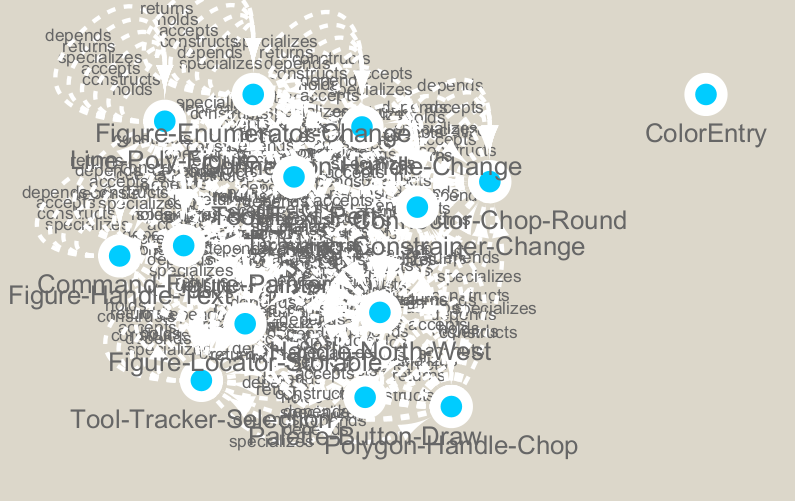

In [23]:
p4c.set_visual_style('Marquee')
p4c.notebook_export_show_image()